In [8]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels),_=mnist.load_data()
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype("float32")/255
train_images_with_noise_channels=np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_with_zeros_channels=np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)


In [9]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
  model = keras.Sequential([
      layers.Dense(512, activation="relu"),
      layers.Dense(10, activation="softmax")
  ])
  model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
  return model

model=get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10, batch_size=128, validation_split=0.2)

model=get_model()
history_zeros=model.fit(
    train_images_with_zeros_channels, train_labels, epochs=10,
    batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.6914 - loss: 1.1173 - val_accuracy: 0.8955 - val_loss: 0.3322
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9127 - loss: 0.2766 - val_accuracy: 0.9432 - val_loss: 0.1912
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9488 - loss: 0.1680 - val_accuracy: 0.9544 - val_loss: 0.1589
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9641 - loss: 0.1188 - val_accuracy: 0.9570 - val_loss: 0.1417
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9734 - loss: 0.0825 - val_accuracy: 0.9647 - val_loss: 0.1136
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9810 - loss: 0.0589 - val_accuracy: 0.9633 - val_loss: 0.1328
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9855 - loss: 0.0447 - val_accuracy: 0.9647 - val_loss: 0.1259
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9892 - loss: 0.0336 - val_accu

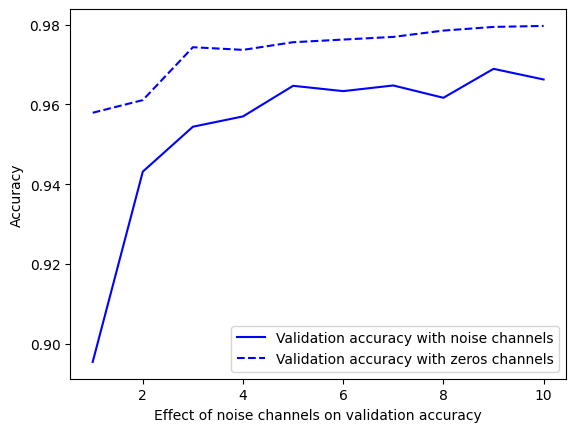

In [10]:
import matplotlib.pyplot as plt

val_acc_noise=history_noise.history["val_accuracy"]
val_acc_zeros=history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-", label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--", label="Validation accuracy with zeros channels")
plt.xlabel("Effect of noise channels on validation accuracy")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [12]:
(train_images, train_labels), _= mnist.load_data()
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype("float32")/255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100, batch_size=128,
          validation_split=0.2
)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.1003 - loss: 2.3325 - val_accuracy: 0.0997 - val_loss: 2.3053
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1142 - loss: 2.2983 - val_accuracy: 0.1005 - val_loss: 2.3087
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.1251 - loss: 2.2889 - val_accuracy: 0.1063 - val_loss: 2.3168
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1378 - loss: 2.2771 - val_accuracy: 0.1041 - val_loss: 2.3226
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1529 - loss: 2.2587 - val_accuracy: 0.1003 - val_loss: 2.3308
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.1678 - loss: 2.2391 - val_accuracy: 0.0984 - val_loss: 2.3425
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1834 - loss: 2.2140 - val_accuracy: 0.1019 - val_loss: 2.3521
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2000 - loss: 2.1892 - 

In [3]:
import numpy as np

num_validation_samples = 10000
np.random.shuffle(data)
validation_data = data[:num_validation_samples]
training_data = data[num_validation_samples:]
model = get_model()
model.fit(training_data, ...)
validation_score = model.evaluate(validation_data, ...)
model.fit(np.concatenate([training_data, validation_data]), ...)
test_score = model.evaluate(test_data, ...)

NameError: name 'data' is not defined

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, models, layers

# MNIST 데이터셋을 로드합니다.
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# 데이터 정규화 (0~1 사이로 값 변환)
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# 데이터를 결합하여 하나의 'data' 변수로 설정
data = np.concatenate((train_images, test_images), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# 전체 데이터에서 검증용 샘플 개수
num_validation_samples = 10000

# 데이터를 무작위로 섞기
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

# 검증 데이터와 훈련 데이터 분리
validation_data = data[:num_validation_samples]
validation_labels = labels[:num_validation_samples]
training_data = data[num_validation_samples:]
training_labels = labels[num_validation_samples:]

# 모델 정의
def get_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# 모델 생성
model = get_model()

# 모델 훈련 (훈련 데이터)
model.fit(training_data, training_labels, epochs=5, batch_size=32)

# 검증 데이터로 성능 평가
validation_score = model.evaluate(validation_data, validation_labels)

# 검증 데이터 포함하여 모델 재훈련 (훈련 + 검증 데이터)
combined_data = np.concatenate([training_data, validation_data])
combined_labels = np.concatenate([training_labels, validation_labels])
model.fit(combined_data, combined_labels, epochs=5, batch_size=32)

# 테스트 데이터에서 최종 성능 평가
test_score = model.evaluate(test_images, test_labels)

print(f"Validation Score: {validation_score}")
print(f"Test Score: {test_score}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8760 - loss: 0.4340
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9639 - loss: 0.1276
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9761 - loss: 0.0816
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9818 - loss: 0.0589
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9869 - loss: 0.0423
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9743 - loss: 0.0842
Epoch 1/5
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9871 - loss: 0.0422
Epoch 2/5
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9911 - loss: 0.0318
Epoch 3/5
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9926 - loss: 0.0236
Epoch 4/5
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9943 - loss: 0.0190
Epoch 5/5
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9951 - loss: 0.0157
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accura

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
from sklearn.model_selection import KFold

# MNIST 데이터셋을 로드합니다.
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# 데이터 정규화 (0~1 사이로 값 변환)
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# 데이터를 결합하여 하나의 'data' 변수로 설정
data = train_images
labels = train_labels

# 3겹 교차 검증을 위한 KFold 설정
kfold = KFold(n_splits=3, shuffle=True)

# 모델 정의 함수
def get_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# 3겹 교차 검증 실행
fold_no = 1
validation_scores = []

for train_index, val_index in kfold.split(data):
    print(f"Training fold {fold_no}...")

    # 폴드에 맞게 훈련 데이터와 검증 데이터 분리
    training_data, validation_data = data[train_index], data[val_index]
    training_labels, validation_labels = labels[train_index], labels[val_index]

    # 모델 생성
    model = get_model()

    # 모델 훈련
    model.fit(training_data, training_labels, epochs=5, batch_size=32, verbose=0)

    # 검증 데이터로 성능 평가
    validation_score = model.evaluate(validation_data, validation_labels, verbose=0)
    validation_scores.append(validation_score[1])  # accuracy score 저장

    print(f"Fold {fold_no} - Validation Accuracy: {validation_score[1]}")
    fold_no += 1

# 교차 검증의 평균 성능
avg_validation_score = np.mean(validation_scores)
print(f"Average Validation Accuracy over 3 folds: {avg_validation_score}")

# 최종 모델을 훈련과 검증 데이터 전체로 재학습하고 테스트 데이터로 평가
final_model = get_model()
final_model.fit(data, labels, epochs=5, batch_size=32, verbose=0)
test_score = final_model.evaluate(test_images, test_labels)

print(f"Test Accuracy: {test_score[1]}")


Training fold 1...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Fold 1 - Validation Accuracy: 0.9668499827384949
Training fold 2...
Fold 2 - Validation Accuracy: 0.9671000242233276
Training fold 3...
Fold 3 - Validation Accuracy: 0.9702000021934509
Average Validation Accuracy over 3 folds: 0.9680500030517578
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9743 - loss: 0.0897
Test Accuracy: 0.9782000184059143


In [12]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers


(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels,
          epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.4245 - loss: 2488.1975 - val_accuracy: 0.2172 - val_loss: 2.1889
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.2366 - loss: 2.7749 - val_accuracy: 0.2446 - val_loss: 2.0669
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.2390 - loss: 2.7251 - val_accuracy: 0.2670 - val_loss: 2.3356
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2166 - loss: 2.4215 - val_accuracy: 0.1665 - val_loss: 2.2236
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1897 - loss: 2.4539 - val_accuracy: 0.2479 - val_loss: 2.3916
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.2129 - loss: 2.4864 - val_accuracy: 0.2409 - val_loss: 2.1049
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.2403 - loss: 2.3777 - val_accuracy: 0.1756 - val_loss: 2.2092
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.2259 - loss: 2.5011 - val_a

In [13]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers


(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels,
          epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8312 - loss: 0.9339 - val_accuracy: 0.9622 - val_loss: 0.1399
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9643 - loss: 0.1251 - val_accuracy: 0.9590 - val_loss: 0.1666
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9738 - loss: 0.0984 - val_accuracy: 0.9678 - val_loss: 0.1357
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9809 - loss: 0.0765 - val_accuracy: 0.9617 - val_loss: 0.2193
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9839 - loss: 0.0601 - val_accuracy: 0.9693 - val_loss: 0.1783
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9863 - loss: 0.0504 - val_accuracy: 0.9724 - val_loss: 0.1687
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9875 - loss: 0.0523 - val_accuracy: 0.9671 - val_loss: 0.2360
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9891 - loss: 0.0418 - val_accu

In [14]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers


(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=keras.optimizers.RMSprop(0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels,
          epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7435 - loss: 1.1400 - val_accuracy: 0.9095 - val_loss: 0.3427
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9075 - loss: 0.3414 - val_accuracy: 0.9254 - val_loss: 0.2680
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9265 - loss: 0.2709 - val_accuracy: 0.9357 - val_loss: 0.2319
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9367 - loss: 0.2337 - val_accuracy: 0.9425 - val_loss: 0.2085
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9434 - loss: 0.2071 - val_accuracy: 0.9480 - val_loss: 0.1905
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9480 - loss: 0.1862 - val_accuracy: 0.9505 - val_loss: 0.1757
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9534 - loss: 0.1644 - val_accuracy: 0.9550 - val_loss: 0.1620
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9574 - loss: 0.1537 - val_accu

In [15]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers


(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=keras.optimizers.RMSprop(0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels,
          epochs=10, batch_size=512, validation_split=0.2)

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.5748 - loss: 1.6838 - val_accuracy: 0.8629 - val_loss: 0.6931
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.8628 - loss: 0.6286 - val_accuracy: 0.8975 - val_loss: 0.4142
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.8940 - loss: 0.4183 - val_accuracy: 0.9138 - val_loss: 0.3352
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9082 - loss: 0.3451 - val_accuracy: 0.9197 - val_loss: 0.2979
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9188 - loss: 0.3055 - val_accuracy: 0.9244 - val_loss: 0.2745
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9234 - loss: 0.2797 - val_accuracy: 0.9311 - val_loss: 0.2548
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9295 - loss: 0.2610 - val_accuracy: 0.9348 - val_loss: 0.2403
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9335 - loss: 0.2424 - val_accuracy: 0.9373 - v

In [17]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history_small_model = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7513 - loss: 1.0081 - val_accuracy: 0.9039 - val_loss: 0.3591
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8989 - loss: 0.3640 - val_accuracy: 0.9145 - val_loss: 0.3079
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9107 - loss: 0.3182 - val_accuracy: 0.9189 - val_loss: 0.2929
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9127 - loss: 0.3095 - val_accuracy: 0.9197 - val_loss: 0.2845
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9181 - loss: 0.2939 - val_accuracy: 0.9229 - val_loss: 0.2786
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9207 - loss: 0.2903 - val_accuracy: 0.9239 - val_loss: 0.2753
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9220 - loss: 0.2798 - val_accuracy: 0.9266 - val_loss: 0.2714
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9246 - loss: 0.2708 - val_accuracy: 0.

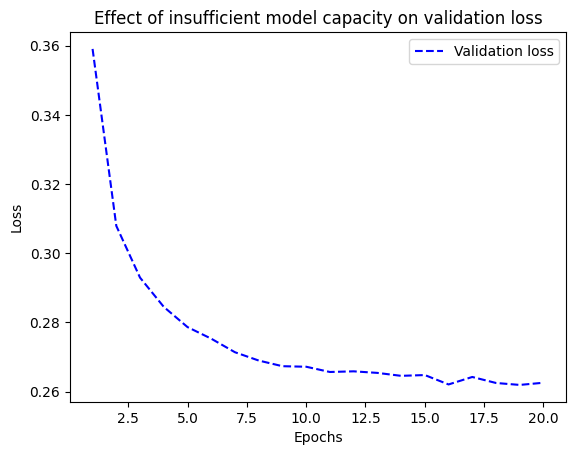

In [19]:
import matplotlib.pyplot as plt

val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--", label = "Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [20]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history_large_model = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8314 - loss: 0.6082 - val_accuracy: 0.9421 - val_loss: 0.1909
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9481 - loss: 0.1767 - val_accuracy: 0.9578 - val_loss: 0.1414
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9651 - loss: 0.1166 - val_accuracy: 0.9607 - val_loss: 0.1341
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9720 - loss: 0.0917 - val_accuracy: 0.9709 - val_loss: 0.0991
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9784 - loss: 0.0730 - val_accuracy: 0.9718 - val_loss: 0.0937
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9831 - loss: 0.0574 - val_accuracy: 0.9727 - val_loss: 0.0973
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9857 - loss: 0.0474 - val_accuracy: 0.9691 - val_loss: 0.1105
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9879 - loss: 0.0383 - val_accuracy: 0.

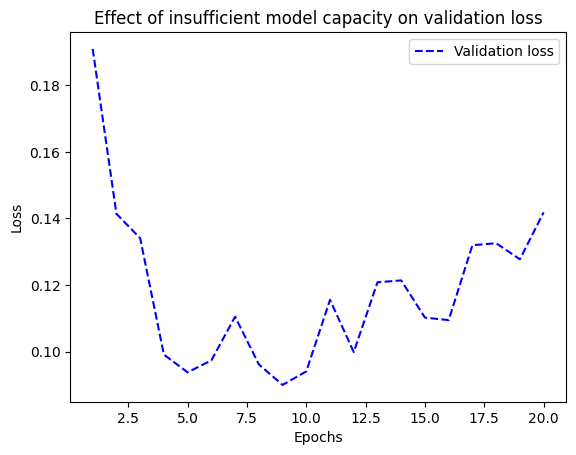

In [22]:
import matplotlib.pyplot as plt

val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--", label = "Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [28]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels),_=imdb.load_data(num_word=10000)

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
        sequence = [min(index, dimension - 1) for index in sequence]
        results[i, sequence] = 1.
  return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history_original = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.6863 - loss: 0.6128 - val_accuracy: 0.8638 - val_loss: 0.4115
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.8952 - loss: 0.3536 - val_accuracy: 0.8790 - val_loss: 0.3265
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.9219 - loss: 0.2561 - val_accuracy: 0.8885 - val_loss: 0.2911
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.9388 - loss: 0.2019 - val_accuracy: 0.8937 - val_loss: 0.2760
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9509 - loss: 0.1658 - val_accuracy: 0.8864 - val_loss: 0.2840
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9581 - loss: 0.1387 - val_accuracy: 0.8881 - val_loss: 0.2851
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9661 - loss: 0.1184 - val_accuracy: 0.8844 - val_loss: 0.2967
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9717 - loss: 0.0989 - val_accuracy: 0.8718 - v

In [31]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history_original2 = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.6181 - loss: 0.6578 - val_accuracy: 0.8102 - val_loss: 0.5476
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8517 - loss: 0.5150 - val_accuracy: 0.8666 - val_loss: 0.4589
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.8919 - loss: 0.4199 - val_accuracy: 0.8616 - val_loss: 0.4009
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9067 - loss: 0.3520 - val_accuracy: 0.8834 - val_loss: 0.3512
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9163 - loss: 0.3002 - val_accuracy: 0.8872 - val_loss: 0.3221
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9251 - loss: 0.2620 - val_accuracy: 0.8890 - val_loss: 0.3010
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9348 - loss: 0.2293 - val_accuracy: 0.8895 - val_loss: 0.2888
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9388 - loss: 0.2048 - val_accuracy: 0.8921 - v

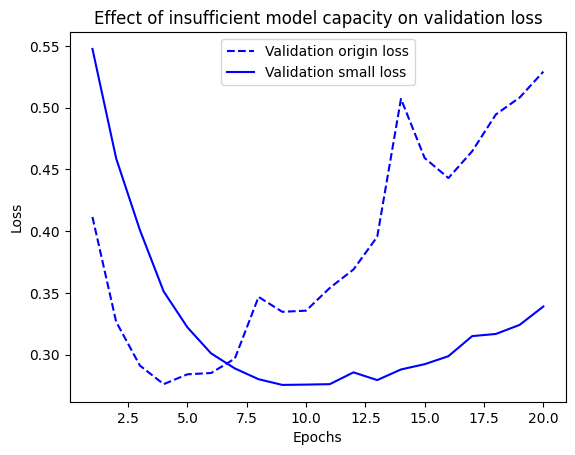

In [37]:
import matplotlib.pyplot as plt

val_loss = history_original.history["val_loss"]
val_loss1 = history_original2.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--", label = "Validation origin loss")
plt.plot(epochs, val_loss1, "b-", label = "Validation small loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [38]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history_original3 = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 367ms/step - accuracy: 0.6388 - loss: 0.6501 - val_accuracy: 0.8219 - val_loss: 0.3950
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 551ms/step - accuracy: 0.8453 - loss: 0.3529 - val_accuracy: 0.8855 - val_loss: 0.2838
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 517ms/step - accuracy: 0.9099 - loss: 0.2338 - val_accuracy: 0.8825 - val_loss: 0.2805
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 605ms/step - accuracy: 0.9377 - loss: 0.1712 - val_accuracy: 0.8892 - val_loss: 0.2752
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 516ms/step - accuracy: 0.9499 - loss: 0.1366 - val_accuracy: 0.8835 - val_loss: 0.2910
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 374ms/step - accuracy: 0.9693 - loss: 0.0927 - val_accuracy: 0.8866 - val_loss: 0.2948
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 375ms/step - accuracy: 0.9835 - loss: 0.0568 - val_accuracy: 0.8854 - val_loss: 0.3379
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 301ms/step - accuracy: 0.9856 - loss: 0.0501 - val_accur

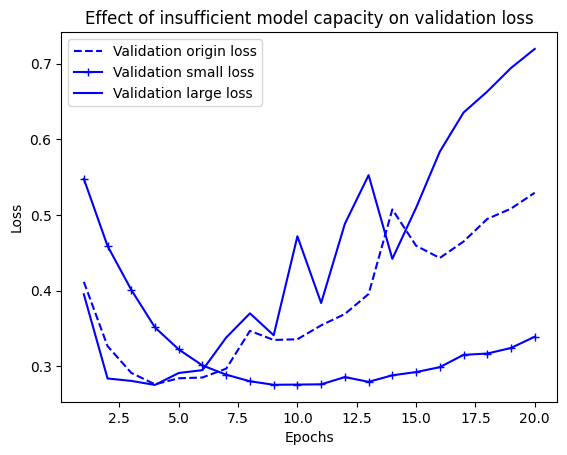

In [48]:
import matplotlib.pyplot as plt

val_loss = history_original.history["val_loss"]
val_loss1 = history_original2.history["val_loss"]
val_loss2 = history_original3.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--", label = "Validation origin loss")
plt.plot(epochs, val_loss1, "b-+", label = "Validation small loss")
plt.plot(epochs, val_loss2, "b", label = "Validation large loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [60]:
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer = regularizers.l2(0.002),
activation="relu"),
    layers.Dense(16,
                 kernel_regularizer = regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation = "sigmoid")
])

model. compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history_l2_reg = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.5972 - loss: 0.7329 - val_accuracy: 0.7754 - val_loss: 0.5886
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.8549 - loss: 0.5282 - val_accuracy: 0.8265 - val_loss: 0.4833
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9045 - loss: 0.3952 - val_accuracy: 0.8881 - val_loss: 0.3829
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9281 - loss: 0.3152 - val_accuracy: 0.8702 - val_loss: 0.3890
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9319 - loss: 0.2825 - val_accuracy: 0.8907 - val_loss: 0.3517
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9415 - loss: 0.2570 - val_accuracy: 0.8845 - val_loss: 0.3621
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9524 - loss: 0.2376 - val_accuracy: 0.8854 - val_loss: 0.3587
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9557 - loss: 0.2252 - val_accuracy: 0.8808 - v

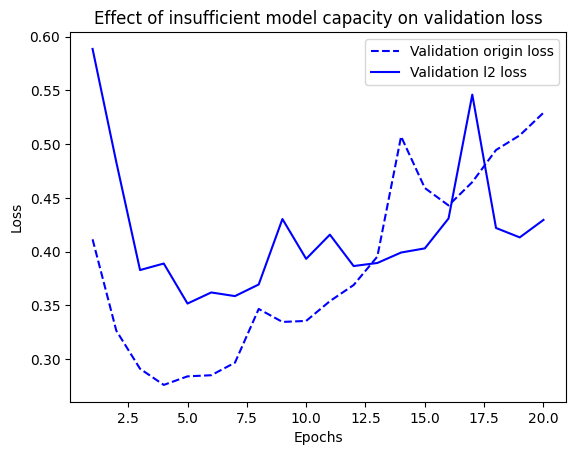

In [61]:
import matplotlib.pyplot as plt

val_loss = history_original.history["val_loss"]
val_loss1 = history_l2_reg.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--", label = "Validation origin loss")
plt.plot(epochs, val_loss1, "b-", label = "Validation l2 loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [62]:
from tensorflow.keras import regularizers

regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

In [63]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history_dropout = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.5544 - loss: 0.6819 - val_accuracy: 0.8351 - val_loss: 0.6058
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6992 - loss: 0.6049 - val_accuracy: 0.8447 - val_loss: 0.5156
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7729 - loss: 0.5274 - val_accuracy: 0.8541 - val_loss: 0.4411
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.8157 - loss: 0.4604 - val_accuracy: 0.8792 - val_loss: 0.3745
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8491 - loss: 0.4078 - val_accuracy: 0.8860 - val_loss: 0.3253
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8684 - loss: 0.3604 - val_accuracy: 0.8765 - val_loss: 0.3078
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8871 - loss: 0.3235 - val_accuracy: 0.8840 - val_loss: 0.3052
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9021 - loss: 0.2839 - val_accuracy: 0.8892 - v

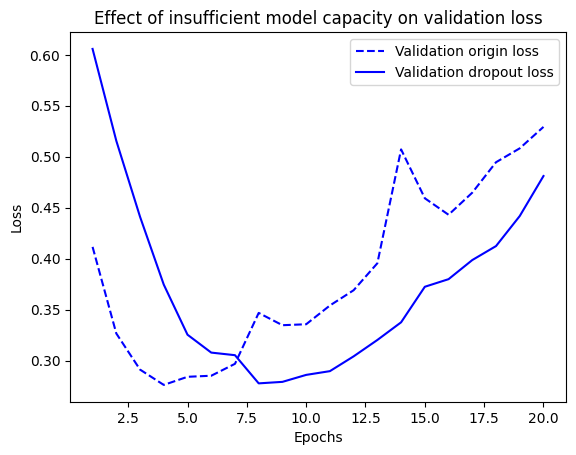

In [64]:
val_loss = history_original.history["val_loss"]
val_loss1 = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--", label = "Validation origin loss")
plt.plot(epochs, val_loss1, "b-", label = "Validation dropout loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()